# Atividade 2 - Preparação de Dados
Código em Python para análise e preparação de dados, conforme proposta da atividade 2 da disciplina de Machine Learning do curso de Ciência de Dados e Big Data da PUC-MG.

**Professor:** Hugo de Paula 

**Aluno:** Carlos Alberto Rocha Cardoso

Agosto de 2019 



##Bibliotecas e parametrização do ambiente

In [0]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

##Importação dos dados
O arquivo original para a atividade foi fornecido no formato **xlsx** e convertido para **csv** ao realizar o download da origem.

In [5]:
from google.colab import files

uploaded = files.upload()

Saving automoveis.csv to automoveis.csv


No método do pandas **read_csv** foi utilizado o parâmetro **decimal=' , '** para correta identificação do caracter decimal e dos tipos numéricos das colunas.


In [0]:
automoveis = pd.read_csv(next(iter(uploaded.keys())), decimal=',')

In [36]:
print("\nDimensões:\n{0}\n".format(automoveis.shape))
print("\nCampos:\n{0}\n".format(list(automoveis.keys())))
print("\nTipos dos dados:\n{0}\n".format(automoveis.dtypes))
print("\nAmostra:\n{0}\n".format(automoveis.head()))


Dimensões:
(205, 15)


Campos:
['Fabricante', 'Combustível', 'Portas', 'Estilo Chassis', 'Tração', 'Comprimento', 'Largura', 'Altura', 'Tipo de motor', 'Número de cilindros', 'Tamanho do motor', 'Tipo de injeção', 'Potência (HP)', 'Pico RPM', 'Preço']


Tipos dos dados:
Fabricante              object
Combustível             object
Portas                 float64
Estilo Chassis          object
Tração                  object
Comprimento            float64
Largura                float64
Altura                 float64
Tipo de motor           object
Número de cilindros     object
Tamanho do motor       float64
Tipo de injeção         object
Potência (HP)          float64
Pico RPM               float64
Preço                  float64
dtype: object


Amostra:
   Fabricante Combustível  Portas Estilo Chassis     Tração  Comprimento  \
0  alfa-romeo         gas     2.0    conversível   traseira        168.8   
1  alfa-romeo         gas     2.0    conversível   traseira        168.8   
2  alfa-ro

##Análise Descritiva

In [37]:
print("Atributos Numéricos:\n",automoveis.describe())

categ = automoveis.dtypes[automoveis.dtypes == 'object'].index
print('\nAtributos Categóricos:\n', automoveis[categ].describe())

Atributos Numéricos:
        Portas  Comprimento  Largura  Altura  Tamanho do motor  Potência (HP)  \
count  203.00       205.00   205.00  205.00            205.00         205.00   
mean     3.12       174.05    65.91   53.72            126.91         104.26   
std      0.99        12.34     2.15    2.44             41.64          39.52   
min      2.00       141.10    60.30   47.80             61.00          48.00   
25%      2.00       166.30    64.10   52.00             97.00          70.00   
50%      4.00       173.20    65.50   54.10            120.00          95.00   
75%      4.00       183.10    66.90   55.50            141.00         116.00   
max      4.00       208.10    72.30   59.80            326.00         288.00   

        Pico RPM     Preço  
count     205.00    205.00  
mean    10727.32  13207.13  
std     56645.35   7868.77  
min      4150.00   5118.00  
25%      4800.00   7788.00  
50%      5200.00  10595.00  
75%      5500.00  16500.00  
max    580000.00  45400.0

###Observações:

*   Os atributos **Portas, Fabricante e Combustível** possuem dados faltantes
*   O atributo **Pico RPM** possui um valor máximo que foge ao padrão dos demais.
*   O atributo **Número de cilindros** apesar de ser apresentado como do tipo object armazena valores númericos, a moda por exemplo é o valor 4.
* O atributo **Portas** pode ser convertido para categoria



##TRANSFORMAÇÃO DE ATRIBUTOS

Optou-se por transofrmar o atributo **Portas** em categorico dada sua distribuição de valores.

In [38]:
novo_portas = pd.Categorical(automoveis['Portas'])
print("Valores únicos para a categoria Portas:\n",novo_portas.unique())


Valores únicos para a categoria Portas:
 [2.0, 4.0, NaN]
Categories (2, float64): [2.0, 4.0]


In [39]:
novo_portas = novo_portas.rename_categories(['2 portas', '4 portas'])
automoveis['Portas'] = novo_portas
print("Análise do atributo Portas:\n",automoveis['Portas'].describe())

Análise do atributo Portas:
 count          203
unique           2
top       4 portas
freq           114
Name: Portas, dtype: object


##Valores Inconsistentes

Avaliando possíveis iconsistências para os atributos categóricos

In [40]:
# Listando valores únicos para os atributos categóricos
categ_q1 = (automoveis.dtypes == 'category') | (automoveis.dtypes == 'object')
categ = automoveis.dtypes[categ_q1].index

for c in categ:
  print('\nValores únicos de %s:\n%s'%(c, automoveis[c].unique()))


Valores únicos de Fabricante:
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo' nan]

Valores únicos de Combustível:
['gas' 'diesel' nan]

Valores únicos de Portas:
[2 portas, 4 portas, NaN]
Categories (2, object): [2 portas, 4 portas]

Valores únicos de Estilo Chassis:
['conversível' 'hatch' 'sedan' 'suv' 'hardtop']

Valores únicos de Tração:
['traseira' 'dianteira' '4x4']

Valores únicos de Tipo de motor:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Valores únicos de Número de cilindros:
['4' '6' '5' '3' 'doze' '2' 'oito']

Valores únicos de Tipo de injeção:
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


Ao imprimir os valores únicos, foi identificada uma inconsistência no atributo **Número de cilindros**. Alguns valores numéros estavam armazenados por extenso. 


Esses valores foram então convertidos.

In [0]:
#Convertendo valores para Número de cilindros
replace_vals = {'doze':'12','oito':'8'}
automoveis['Número de cilindros'] = automoveis['Número de cilindros'].replace(replace_vals)


In [42]:
print("Valores após conversão:\n",automoveis['Número de cilindros'].unique())

Valores após conversão:
 ['4' '6' '5' '3' '12' '2' '8']


In [13]:
#Alterando tipo do atributo Número de cilindros
automoveis['Número de cilindros'] = automoveis['Número de cilindros'].astype(float)
print("Tipo do atributo Número de cilindros:",automoveis['Número de cilindros'].dtype)

Tipo do atributo Número de cilindros: float64


In [14]:
print("\nTipos dos dados:\n{0}\n".format(automoveis.dtypes))


Tipos dos dados:
Fabricante               object
Combustível              object
Portas                 category
Estilo Chassis           object
Tração                   object
Comprimento             float64
Largura                 float64
Altura                  float64
Tipo de motor            object
Número de cilindros     float64
Tamanho do motor        float64
Tipo de injeção          object
Potência (HP)           float64
Pico RPM                float64
Preço                   float64
dtype: object



##Valores Faltantes

###Análise do atributo Portas

In [43]:
print("Registros com valor nulo para o atributo Portas:\n\n",automoveis[automoveis['Portas'].isnull()])

Registros com valor nulo para o atributo Portas:

    Fabricante Combustível Portas Estilo Chassis     Tração  Comprimento  \
26      dodge         gas    NaN          sedan  dianteira        157.3   
61      mazda      diesel    NaN          sedan  dianteira        177.8   

    Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
26     63.8    50.6           ohc                   4              98.0   
61     66.5    55.5           ohc                   4             122.0   

   Tipo de injeção  Potência (HP)  Pico RPM    Preço  
26            mpfi          102.0    5500.0   8558.0  
61             idi           64.0    4650.0  10795.0  


Com base nos registros com valores nulos para o atributo **Portas**, foi verificada a quantidade de portas para os carros sedan dos fabricantes dodge e mazda

In [44]:
#Filtro para consulta dos valores para o atributo Portas
portas_q1 = (automoveis['Estilo Chassis'] == 'sedan') & \
            ((automoveis['Fabricante'] == 'dodge') | (automoveis['Fabricante'] == 'mazda'))

print("\nQuantidade de portas para carros sedan dos fabricantes dodge e mazda:\n", automoveis[portas_q1]['Portas'].unique())

print('\nRegistros:\n', automoveis[portas_q1])



Quantidade de portas para carros sedan dos fabricantes dodge e mazda:
 [4 portas, NaN]
Categories (1, object): [4 portas]

Registros:
    Fabricante Combustível    Portas Estilo Chassis     Tração  Comprimento  \
24      dodge         gas  4 portas          sedan  dianteira        157.3   
25      dodge         gas  4 portas          sedan  dianteira        157.3   
26      dodge         gas       NaN          sedan  dianteira        157.3   
52      mazda         gas  4 portas          sedan  dianteira        166.8   
53      mazda         gas  4 portas          sedan  dianteira        166.8   
58      mazda         gas  4 portas          sedan  dianteira        177.8   
60      mazda         gas  4 portas          sedan  dianteira        177.8   
61      mazda      diesel       NaN          sedan  dianteira        177.8   
63      mazda         gas  4 portas          sedan   traseira        175.0   
64      mazda      diesel  4 portas          sedan   traseira        175.0   

    L

Para o atributo **Portas**, foram substituído os valores nulos pelo valor **4 portas**,
considerando que para a categoria sedan dos fabricantes mazda e dodge, todos os registros não nulos possuem 4 portas.

In [45]:
automoveis.loc[automoveis['Portas'].isnull(),['Portas']] = '4 portas'

print('Análise do atributo Portas:\n', automoveis['Portas'].describe())
print("\nQuantidade de portas para carros sedan dos fabricantes dodge e mazda:\n", automoveis[portas_q1]['Portas'].unique())

Análise do atributo Portas:
 count          205
unique           2
top       4 portas
freq           116
Name: Portas, dtype: object

Quantidade de portas para carros sedan dos fabricantes dodge e mazda:
 [4 portas]
Categories (1, object): [4 portas]


###Análise do atributo Fabricante

In [46]:

print("Registros com valor nulo para o atributo Fabricante:\n\n",automoveis[automoveis['Fabricante'].isnull()])

    Fabricante Combustível    Portas Estilo Chassis    Tração  Comprimento  \
203        NaN         gas  4 portas          sedan  traseira        176.8   
204        NaN         gas  2 portas          hatch  traseira        169.0   

     Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
203     64.8    54.3           ohc                   6             164.0   
204     65.7    49.6         rotor                   2              70.0   

    Tipo de injeção  Potência (HP)  Pico RPM    Preço  
203            mpfi          121.0    4250.0  21105.0  
204            4bbl          101.0    6000.0  10945.0  


Após analisar os registros, optou-se por substiruir os valores nulos da varíavel **Fabricante** pelo valor **"Não Informado"** 

In [47]:
automoveis.loc[automoveis['Fabricante'].isnull(),['Fabricante']] = 'Não Informado'

print('Análise da variável Fabricante:\n', automoveis['Fabricante'].describe())

Análise da variável Fabricante:
 count        205
unique        23
top       toyota
freq          32
Name: Fabricante, dtype: object


###Análise do atributo Combustível

In [49]:
print("Registros com valor nulo para o atributo Combustível:\n\n",automoveis[automoveis['Combustível'].isnull()])

    Fabricante Combustível    Portas Estilo Chassis     Tração  Comprimento  \
117   plymouth         NaN  2 portas          hatch  dianteira        157.3   
118   plymouth         NaN  4 portas          hatch  dianteira        157.3   
119   plymouth         NaN  4 portas          sedan  dianteira        167.3   
125    porsche         NaN  2 portas        hardtop   traseira        168.9   
139     subaru         NaN  4 portas          sedan  dianteira        172.0   

     Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
117     63.8    50.8           ohc                   4              98.0   
118     63.8    50.6           ohc                   4              90.0   
119     63.8    50.8           ohc                   4              90.0   
125     65.0    51.6          ohcf                   6             194.0   
139     65.4    52.5          ohcf                   4             108.0   

    Tipo de injeção  Potência (HP)  Pico RPM    Preço  
117         

Com base nos registros com valores nulos para o atributo **Combustível**, foi verificado o tipo de combsutível para os fabricantes plymouth, porsche e subaru

In [50]:
#Filtro para consulta dos valores de Combustível
combustivel_q1 = (automoveis['Fabricante'] == 'plymouth') | \
                (automoveis['Fabricante'] == 'porsche') | \
                (automoveis['Fabricante'] == 'subaru')

print('Combustível para carros dos fabricantes plymouth, porsche, subaru:\n', automoveis[combustivel_q1]['Combustível'].unique())

print('\nRegistros:\n',automoveis[combustivel_q1])


Combustível para carros dos fabricantes plymouth, porsche, subaru:
 ['gas' nan]

Registros:
     Fabricante Combustível    Portas Estilo Chassis     Tração  Comprimento  \
116   plymouth         gas  2 portas          hatch  dianteira        157.3   
117   plymouth         NaN  2 portas          hatch  dianteira        157.3   
118   plymouth         NaN  4 portas          hatch  dianteira        157.3   
119   plymouth         NaN  4 portas          sedan  dianteira        167.3   
120   plymouth         gas  4 portas          sedan  dianteira        167.3   
121   plymouth         gas  4 portas            suv  dianteira        174.6   
122   plymouth         gas  2 portas          hatch   traseira        173.2   
123    porsche         gas  2 portas          hatch   traseira        168.9   
124    porsche         gas  2 portas        hardtop   traseira        168.9   
125    porsche         NaN  2 portas        hardtop   traseira        168.9   
126    porsche         gas  2 portas  

Para a variável **Combustível**, foram substituídos os valores nulos pelo valor **"gas"**, considerando que para os fabricantes plymouth, porsche, subaru, todos os registros não nulos possuem esse valor.

In [51]:
automoveis.loc[automoveis['Combustível'].isnull(), ['Combustível']] = "gas"
print('Análise da variável Combustível:\n', automoveis['Combustível'].describe())

Análise da variável Combustível:
 count     205
unique      2
top       gas
freq      185
Name: Combustível, dtype: object


##Outliers

Análise da distribuição de valores para o atributo **Pico RPM**

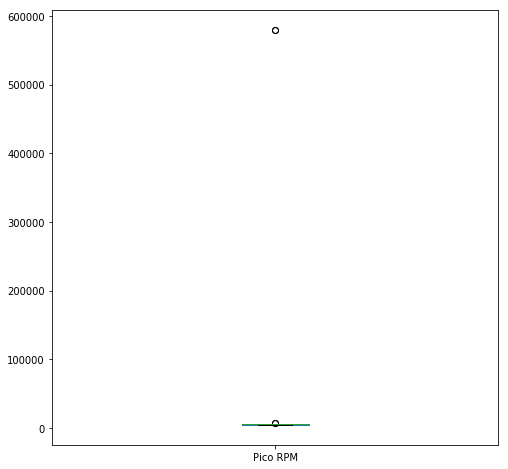

In [52]:

automoveis["Pico RPM"].plot(kind="box", figsize=(8,8))

Conforme já havia sido verificado na análise estatística dos atributos, o atributo **Pico RPM** possuia o valor máximo muito acima dos demais valores do atributo (580000). O mesmo comportamento foi observado no boxplot acima.

In [53]:
picoRPM_q1 = (automoveis['Pico RPM'] == max(automoveis['Pico RPM']))
print("Registros com outlier para Pico RPM:\n", automoveis[picoRPM_q1])

Registros com outlier para Pico RPM:
    Fabricante Combustível    Portas Estilo Chassis    Tração  Comprimento  \
10        bmw         gas  2 portas          sedan  traseira        176.8   
11        bmw         gas  4 portas          sedan  traseira        176.8   

    Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
10     64.8    54.3           ohc                   4             108.0   
11     64.8    54.3           ohc                   4             108.0   

   Tipo de injeção  Potência (HP)  Pico RPM    Preço  
10            mpfi          101.0  580000.0  16430.0  
11            mpfi          101.0  580000.0  16925.0  


A partir dos registros, buscou-se verificar valores razoáveis para o atributo **Pico RPM** em outros registros com faixa de potência semelhante.

In [54]:
#Filtro para consulta de valores do atributo Pico RPM
picoRPM_q2 = (automoveis['Potência (HP)'] >= 100) & (automoveis['Potência (HP)'] < 110)
automoveis[picoRPM_q2]['Pico RPM'].unique()

array([  5500.  , 580000.  ,   5800.  ,   6000.  ,   5125.37,   4800.  ])

Com base nos valores pesquisados, foi considerada a possibilidade do valor armazenado ter sido registrado em uma escala 100x maior que a original. Dessa forma optou-se por converter o registro para a escala dos demais, dividindo o valor 580000 por 100. 

In [0]:
automoveis.loc[picoRPM_q1,['Pico RPM']] = automoveis.loc[picoRPM_q1,['Pico RPM']]/100

Registros com outlier para Pico RPM:
    Fabricante Combustível    Portas Estilo Chassis    Tração  Comprimento  \
10        bmw         gas  2 portas          sedan  traseira        176.8   
11        bmw         gas  4 portas          sedan  traseira        176.8   

    Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
10     64.8    54.3           ohc                   4             108.0   
11     64.8    54.3           ohc                   4             108.0   

   Tipo de injeção  Potência (HP)  Pico RPM    Preço  
10            mpfi          101.0    5800.0  16430.0  
11            mpfi          101.0    5800.0  16925.0  

Análise da variável Pico RPM:
 count     205.00
mean     5125.37
std       476.98
min      4150.00
25%      4800.00
50%      5200.00
75%      5500.00
max      6600.00
Name: Pico RPM, dtype: float64


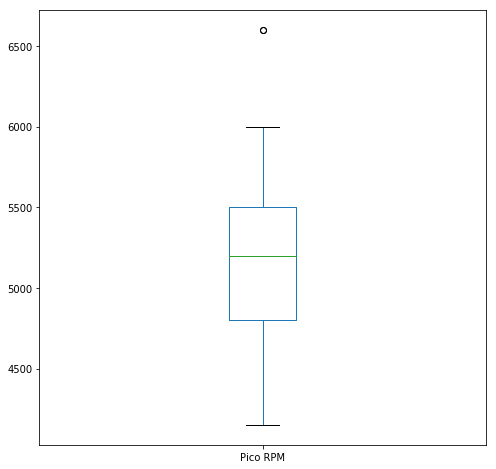

In [56]:
print("Registros com outlier para Pico RPM:\n", automoveis[picoRPM_q1])

print('\nAnálise da variável Pico RPM:\n', automoveis['Pico RPM'].describe())
automoveis['Pico RPM'].plot(kind="box", figsize=(8,8))

##CRIAÇÃO DE NOVOS ATRIBUTOS

###Atributo volume a partir da altura, largura e comprimento

In [0]:
automoveis["Volume"] = automoveis["Altura"] * automoveis["Largura"] * automoveis["Comprimento"]

###Atributo área a partir da largura e comprimento

In [0]:
automoveis["Area"] = automoveis["Largura"] * automoveis["Comprimento"]

##Seleção dos atributos

###Análise de correlação

In [59]:
campos = automoveis.dtypes[automoveis.dtypes == "float64"].index
corr = np.corrcoef(automoveis[campos].transpose())
correlacao = pd.DataFrame(data=corr, index=campos, columns=campos)

print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))


Matriz de correlação dos atributos inteiros:
                  Comprimento  Largura  Altura  Tamanho do motor  \
Comprimento              1.00     0.84    0.49              0.68   
Largura                  0.84     1.00    0.28              0.74   
Altura                   0.49     0.28    1.00              0.07   
Tamanho do motor         0.68     0.74    0.07              1.00   
Potência (HP)            0.55     0.64   -0.11              0.81   
Pico RPM                -0.29    -0.22   -0.32             -0.24   
Preço                    0.68     0.73    0.13              0.86   
Volume                   0.95     0.83    0.70              0.59   
Area                     0.98     0.93    0.44              0.73   

                  Potência (HP)  Pico RPM  Preço  Volume  Area  
Comprimento                0.55     -0.29   0.68    0.95  0.98  
Largura                    0.64     -0.22   0.73    0.83  0.93  
Altura                    -0.11     -0.32   0.13    0.70  0.44  
Tamanho do mo

Com base na matriz, verificou-se forte correlação entre os atributos Volume, Largura, Comprimento e Área.

O atributo Tamanho do motor também apresenta forte correlação com os atributos Número de cilindros, Potência (HP) e Preço.

A partir dessa análise, optou-se por descartar os atributos Volume, Largura, Comprimento e Tamanho do motor.

###Descarte de atributos

In [0]:
del automoveis["Volume"]
del automoveis["Largura"]
del automoveis["Comprimento"]
del automoveis["Tamanho do motor"]

###Análise do correlação após descarte

In [61]:
campos = automoveis.dtypes[automoveis.dtypes == "float64"].index
corr = np.corrcoef(automoveis[campos].transpose())
correlacao = pd.DataFrame(data=corr, index=campos, columns=campos)

print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))


Matriz de correlação dos atributos inteiros:
               Altura  Potência (HP)  Pico RPM  Preço  Area
Altura           1.00          -0.11     -0.32   0.13  0.44
Potência (HP)   -0.11           1.00      0.13   0.76  0.60
Pico RPM        -0.32           0.13      1.00  -0.10 -0.28
Preço            0.13           0.76     -0.10   1.00  0.73
Area             0.44           0.60     -0.28   0.73  1.00


## DATASET FINAL

In [62]:
categ_q1 = (automoveis.dtypes == 'category') | (automoveis.dtypes == 'object')
categ = automoveis.dtypes[categ_q1].index

print("Tipos de Dados:\n",automoveis.dtypes)
print("\nAtributos Numéricos:\n", automoveis.describe())
print('\nAtributos Categóricos:\n', automoveis[categ].describe())

Tipos de Dados:
 Fabricante               object
Combustível              object
Portas                 category
Estilo Chassis           object
Tração                   object
Altura                  float64
Tipo de motor            object
Número de cilindros      object
Tipo de injeção          object
Potência (HP)           float64
Pico RPM                float64
Preço                   float64
Area                    float64
dtype: object

Atributos Numéricos:
        Altura  Potência (HP)  Pico RPM     Preço      Area
count  205.00         205.00    205.00    205.00    205.00
mean    53.72         104.26   5125.37  13207.13  11493.36
std      2.44          39.52    476.98   7868.77   1156.44
min     47.80          48.00   4150.00   5118.00   8508.33
25%     52.00          70.00   4800.00   7788.00  10709.72
50%     54.10          95.00   5200.00  10595.00  11314.20
75%     55.50         116.00   5500.00  16500.00  12275.90
max     59.80         288.00   6600.00  45400.00  14920.77